In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from src.data.make_dataset import *
from IPython.display import Image
from src.stattests import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['axes.titlesize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['legend.fontsize'] = 'large'
matplotlib.rcParams['lines.linewidth'] = 2


In [3]:
energy_df = pd.read_csv('data/raw/energy_dataset.csv')  # Read in datasets
weather_df = pd.read_csv('data/raw/weather_features.csv')

In [4]:
energy_df = datetime_conversion(drop_absent_cols(energy_df))

dropping column:  generation fossil coal-derived gas
dropping column:  generation fossil oil shale
dropping column:  generation fossil peat
dropping column:  generation geothermal
dropping column:  generation hydro pumped storage aggregated
dropping column:  generation marine
dropping column:  generation wind offshore
dropping column:  forecast wind offshore eday ahead


Text(0, 0.5, 'Power Generation (MW)')

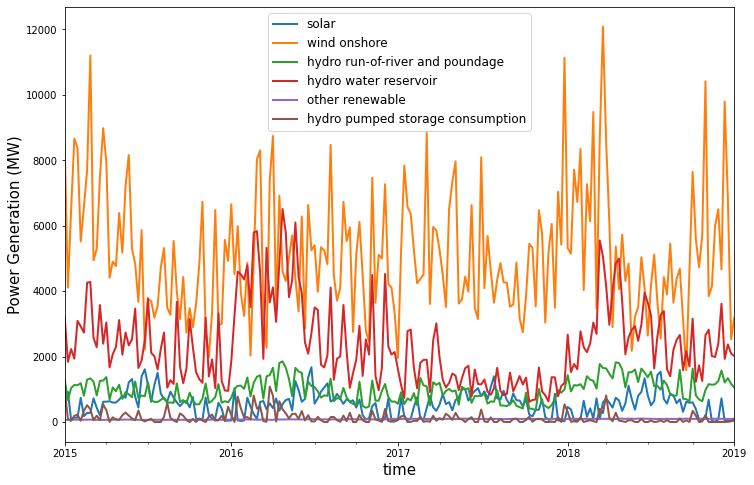

In [22]:
renewable_sources = ['solar', 'wind onshore', 'hydro run-of-river and poundage', 'hydro water reservoir', 'other renewable', 'hydro pumped storage consumption']
renewable_cols = ['generation ' + source for source in renewable_sources]
fossil_fuel_sources = ['fossil brown coal/lignite', 'fossil gas', 'fossil hard coal', 'fossil oil']
fossil_fuel_cols = ['generation ' + source for source in fossil_fuel_sources]
other_source = ['nuclear', 'other', 'waste', 'biomass']
other_cols = ['generation ' + source for source in other_source]

fig,ax = plt.subplots(figsize = (12,8))
for i, col in enumerate(renewable_cols):
     energy_df[col].resample('1w').median().plot(ax=ax, label = renewable_sources[i])
ax.legend()
ax.set_ylabel('Power Generation (MW)')

## Are the time series stationary? Is there an overall trend?

The augmented dicky fuller (adf) test, tests for a unit root, and, while it cannot tell if the data is seasonal (in the case of this dataset), it can determine if there is a growing or decreasing trend in time. In all the power sources, the adf demonstrates that there is no overall increase or decrease in the series.

In [6]:
for i, col in enumerate(renewable_cols):
     adf_test(energy_df[col], renewable_sources[i])


Results of Dickey-Fuller Test for solar:
Test Statistic                -1.391909e+01
p-value                        5.336339e-26
#Lags Used                     5.200000e+01
Number of Observations Used    3.501100e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64
Reject Null Hypothesis, Series is Stationary


Results of Dickey-Fuller Test for wind onshore:
Test Statistic                -1.788782e+01
p-value                        2.985510e-30
#Lags Used                     4.900000e+01
Number of Observations Used    3.501400e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64
Reject Null Hypothesis, Series is Stationary


Results of Dickey-Fuller Test for other renewable:
Test Statistic                -7.829773e+00
p-value                        6.338665e-12
#Lags Used                     5

## Seasonal Decomposition

It will be useful to 

<AxesSubplot:xlabel='time'>

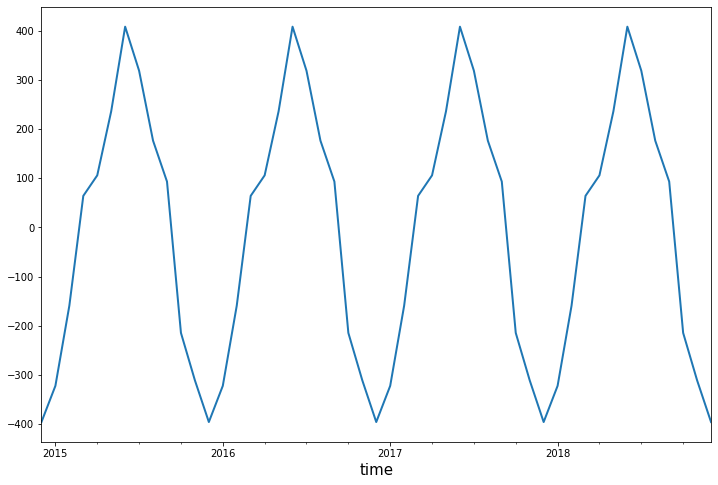

In [21]:
important_renewable_sources = renewable_sources[:3]
fig,ax = plt.subplots(4, 4, figsize=(12, 8))
axs = ax.ravel()
for i, source in enumerate(important_renewable_sources):
    result = seasonal_decompose(energy_df['generation solar'].resample('1m').median())
    result.seasonal.plot(ax=ax)


In [ ]:
result = seasonal_decompose(energy_df['generation solar'].resample('1m').median())
result.plot()